## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.610
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                              3225.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:34:34   Log-Likelihood:                         -15622.
No. Observations:               16512   AIC:                                  3.126e+04
Df Residuals:                   16504   BIC:                                  3.132e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

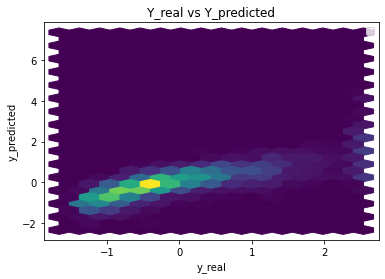

Performance Metrics
Mean Squared Error: 0.4173474785853381
Mean Absolute Error: 0.46792222816050816
Manhattan distance: 1931.5829578465832
Euclidean distance: 41.506751156893436


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.3887550035209903


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9624945	total: 64.5ms	remaining: 1m 4s
1:	learn: 0.9304754	total: 67.8ms	remaining: 33.8s
2:	learn: 0.9003391	total: 70.8ms	remaining: 23.5s
3:	learn: 0.8726530	total: 74ms	remaining: 18.4s
4:	learn: 0.8473117	total: 77.7ms	remaining: 15.5s
5:	learn: 0.8242293	total: 81.2ms	remaining: 13.5s
6:	learn: 0.8023241	total: 83.8ms	remaining: 11.9s
7:	learn: 0.7819563	total: 86.4ms	remaining: 10.7s
8:	learn: 0.7648026	total: 89.2ms	remaining: 9.82s
9:	learn: 0.7462875	total: 91.7ms	remaining: 9.07s
10:	learn: 0.7299872	total: 94.4ms	remaining: 8.49s
11:	learn: 0.7142079	total: 97.9ms	remaining: 8.06s
12:	learn: 0.7008154	total: 100ms	remaining: 7.61s
13:	learn: 0.6858931	total: 103ms	remaining: 7.23s
14:	learn: 0.6747454	total: 105ms	remaining: 6.92s
15:	learn: 0.6629068	total: 108ms	remaining: 6.63s


16:	learn: 0.6516344	total: 112ms	remaining: 6.45s
17:	learn: 0.6422000	total: 114ms	remaining: 6.23s
18:	learn: 0.6340750	total: 117ms	remaining: 6.02s
19:	learn: 0.6239788	total: 119ms	remaining: 5.83s
20:	learn: 0.6160930	total: 122ms	remaining: 5.67s
21:	learn: 0.6084924	total: 125ms	remaining: 5.54s
22:	learn: 0.6008161	total: 127ms	remaining: 5.4s
23:	learn: 0.5949365	total: 130ms	remaining: 5.27s
24:	learn: 0.5891304	total: 132ms	remaining: 5.16s
25:	learn: 0.5835618	total: 135ms	remaining: 5.04s
26:	learn: 0.5769980	total: 137ms	remaining: 4.93s
27:	learn: 0.5723880	total: 140ms	remaining: 4.85s
28:	learn: 0.5665820	total: 142ms	remaining: 4.76s
29:	learn: 0.5617754	total: 145ms	remaining: 4.68s
30:	learn: 0.5584339	total: 148ms	remaining: 4.61s
31:	learn: 0.5550491	total: 150ms	remaining: 4.53s
32:	learn: 0.5512958	total: 153ms	remaining: 4.48s
33:	learn: 0.5483291	total: 156ms	remaining: 4.42s
34:	learn: 0.5433630	total: 158ms	remaining: 4.35s
35:	learn: 0.5403032	total: 160m

48:	learn: 0.5032678	total: 193ms	remaining: 3.74s
49:	learn: 0.5011543	total: 195ms	remaining: 3.71s
50:	learn: 0.4990016	total: 197ms	remaining: 3.67s
51:	learn: 0.4975915	total: 200ms	remaining: 3.64s
52:	learn: 0.4950029	total: 202ms	remaining: 3.61s
53:	learn: 0.4936303	total: 205ms	remaining: 3.6s
54:	learn: 0.4914805	total: 208ms	remaining: 3.57s
55:	learn: 0.4894837	total: 210ms	remaining: 3.54s
56:	learn: 0.4879835	total: 212ms	remaining: 3.51s
57:	learn: 0.4865910	total: 215ms	remaining: 3.49s
58:	learn: 0.4855280	total: 217ms	remaining: 3.46s
59:	learn: 0.4841106	total: 220ms	remaining: 3.44s
60:	learn: 0.4827148	total: 222ms	remaining: 3.42s
61:	learn: 0.4815045	total: 225ms	remaining: 3.4s
62:	learn: 0.4805660	total: 227ms	remaining: 3.38s
63:	learn: 0.4787614	total: 229ms	remaining: 3.35s
64:	learn: 0.4777084	total: 232ms	remaining: 3.33s
65:	learn: 0.4766819	total: 234ms	remaining: 3.31s
66:	learn: 0.4757807	total: 236ms	remaining: 3.29s
67:	learn: 0.4747746	total: 239ms

94:	learn: 0.4533391	total: 306ms	remaining: 2.92s
95:	learn: 0.4526048	total: 309ms	remaining: 2.91s
96:	learn: 0.4519075	total: 311ms	remaining: 2.9s
97:	learn: 0.4513393	total: 314ms	remaining: 2.89s
98:	learn: 0.4503126	total: 317ms	remaining: 2.88s
99:	learn: 0.4498267	total: 319ms	remaining: 2.87s
100:	learn: 0.4488003	total: 321ms	remaining: 2.86s
101:	learn: 0.4484825	total: 324ms	remaining: 2.85s
102:	learn: 0.4481034	total: 326ms	remaining: 2.84s
103:	learn: 0.4476499	total: 328ms	remaining: 2.83s
104:	learn: 0.4471803	total: 331ms	remaining: 2.82s
105:	learn: 0.4467721	total: 333ms	remaining: 2.81s
106:	learn: 0.4461192	total: 335ms	remaining: 2.8s
107:	learn: 0.4454713	total: 338ms	remaining: 2.79s
108:	learn: 0.4448098	total: 340ms	remaining: 2.78s
109:	learn: 0.4442382	total: 342ms	remaining: 2.77s
110:	learn: 0.4439026	total: 345ms	remaining: 2.76s
111:	learn: 0.4435087	total: 347ms	remaining: 2.75s
112:	learn: 0.4427977	total: 350ms	remaining: 2.75s
113:	learn: 0.442102

128:	learn: 0.4343378	total: 389ms	remaining: 2.63s
129:	learn: 0.4339958	total: 391ms	remaining: 2.62s
130:	learn: 0.4336654	total: 394ms	remaining: 2.61s
131:	learn: 0.4332923	total: 396ms	remaining: 2.6s
132:	learn: 0.4327070	total: 400ms	remaining: 2.61s
133:	learn: 0.4321588	total: 402ms	remaining: 2.6s
134:	learn: 0.4313128	total: 404ms	remaining: 2.59s
135:	learn: 0.4308305	total: 407ms	remaining: 2.58s
136:	learn: 0.4306082	total: 409ms	remaining: 2.58s
137:	learn: 0.4301103	total: 412ms	remaining: 2.57s
138:	learn: 0.4293401	total: 414ms	remaining: 2.57s
139:	learn: 0.4290652	total: 417ms	remaining: 2.56s
140:	learn: 0.4286821	total: 420ms	remaining: 2.56s
141:	learn: 0.4282312	total: 422ms	remaining: 2.55s
142:	learn: 0.4277953	total: 424ms	remaining: 2.54s
143:	learn: 0.4274259	total: 427ms	remaining: 2.54s
144:	learn: 0.4269670	total: 429ms	remaining: 2.53s
145:	learn: 0.4265761	total: 431ms	remaining: 2.52s
146:	learn: 0.4262481	total: 436ms	remaining: 2.53s
147:	learn: 0.

167:	learn: 0.4168605	total: 488ms	remaining: 2.42s
168:	learn: 0.4164951	total: 491ms	remaining: 2.41s
169:	learn: 0.4160357	total: 493ms	remaining: 2.41s
170:	learn: 0.4154265	total: 495ms	remaining: 2.4s
171:	learn: 0.4149395	total: 498ms	remaining: 2.4s
172:	learn: 0.4146150	total: 501ms	remaining: 2.39s
173:	learn: 0.4141364	total: 504ms	remaining: 2.39s
174:	learn: 0.4137199	total: 506ms	remaining: 2.39s
175:	learn: 0.4133691	total: 509ms	remaining: 2.38s
176:	learn: 0.4129374	total: 512ms	remaining: 2.38s
177:	learn: 0.4126206	total: 514ms	remaining: 2.37s
178:	learn: 0.4122211	total: 516ms	remaining: 2.37s
179:	learn: 0.4115563	total: 519ms	remaining: 2.36s
180:	learn: 0.4112642	total: 522ms	remaining: 2.36s
181:	learn: 0.4108829	total: 524ms	remaining: 2.35s
182:	learn: 0.4106226	total: 527ms	remaining: 2.35s
183:	learn: 0.4100547	total: 529ms	remaining: 2.35s
184:	learn: 0.4096393	total: 532ms	remaining: 2.34s
185:	learn: 0.4092658	total: 534ms	remaining: 2.34s
186:	learn: 0.

199:	learn: 0.4047407	total: 569ms	remaining: 2.28s
200:	learn: 0.4043398	total: 572ms	remaining: 2.27s
201:	learn: 0.4041182	total: 574ms	remaining: 2.27s
202:	learn: 0.4038313	total: 577ms	remaining: 2.26s
203:	learn: 0.4034921	total: 579ms	remaining: 2.26s
204:	learn: 0.4032209	total: 582ms	remaining: 2.25s
205:	learn: 0.4028780	total: 584ms	remaining: 2.25s
206:	learn: 0.4025321	total: 586ms	remaining: 2.25s
207:	learn: 0.4019105	total: 589ms	remaining: 2.24s
208:	learn: 0.4015831	total: 591ms	remaining: 2.24s
209:	learn: 0.4012974	total: 594ms	remaining: 2.23s
210:	learn: 0.4009709	total: 596ms	remaining: 2.23s
211:	learn: 0.4006594	total: 599ms	remaining: 2.23s
212:	learn: 0.4003131	total: 602ms	remaining: 2.22s
213:	learn: 0.4000306	total: 604ms	remaining: 2.22s
214:	learn: 0.3997209	total: 607ms	remaining: 2.21s
215:	learn: 0.3994205	total: 609ms	remaining: 2.21s
216:	learn: 0.3989217	total: 612ms	remaining: 2.21s
217:	learn: 0.3986902	total: 614ms	remaining: 2.2s
218:	learn: 0

245:	learn: 0.3902960	total: 686ms	remaining: 2.1s
246:	learn: 0.3900355	total: 688ms	remaining: 2.1s
247:	learn: 0.3897098	total: 691ms	remaining: 2.09s
248:	learn: 0.3894471	total: 693ms	remaining: 2.09s
249:	learn: 0.3892969	total: 695ms	remaining: 2.08s
250:	learn: 0.3890850	total: 698ms	remaining: 2.08s
251:	learn: 0.3888337	total: 700ms	remaining: 2.08s
252:	learn: 0.3885864	total: 703ms	remaining: 2.08s
253:	learn: 0.3883688	total: 705ms	remaining: 2.07s
254:	learn: 0.3879745	total: 708ms	remaining: 2.07s
255:	learn: 0.3876591	total: 710ms	remaining: 2.06s
256:	learn: 0.3873231	total: 713ms	remaining: 2.06s
257:	learn: 0.3869941	total: 715ms	remaining: 2.06s
258:	learn: 0.3867619	total: 718ms	remaining: 2.05s
259:	learn: 0.3864908	total: 720ms	remaining: 2.05s
260:	learn: 0.3863212	total: 723ms	remaining: 2.05s
261:	learn: 0.3859968	total: 725ms	remaining: 2.04s
262:	learn: 0.3858158	total: 727ms	remaining: 2.04s
263:	learn: 0.3856081	total: 730ms	remaining: 2.03s
264:	learn: 0.

279:	learn: 0.3816785	total: 768ms	remaining: 1.97s
280:	learn: 0.3814979	total: 771ms	remaining: 1.97s
281:	learn: 0.3813011	total: 773ms	remaining: 1.97s
282:	learn: 0.3810701	total: 775ms	remaining: 1.96s
283:	learn: 0.3808056	total: 778ms	remaining: 1.96s
284:	learn: 0.3806773	total: 780ms	remaining: 1.96s
285:	learn: 0.3803931	total: 783ms	remaining: 1.95s
286:	learn: 0.3802579	total: 785ms	remaining: 1.95s
287:	learn: 0.3801098	total: 787ms	remaining: 1.95s
288:	learn: 0.3798339	total: 790ms	remaining: 1.94s
289:	learn: 0.3796246	total: 792ms	remaining: 1.94s
290:	learn: 0.3794284	total: 794ms	remaining: 1.93s
291:	learn: 0.3792774	total: 796ms	remaining: 1.93s
292:	learn: 0.3790932	total: 799ms	remaining: 1.93s
293:	learn: 0.3788410	total: 801ms	remaining: 1.92s
294:	learn: 0.3786363	total: 804ms	remaining: 1.92s
295:	learn: 0.3783855	total: 807ms	remaining: 1.92s
296:	learn: 0.3780842	total: 809ms	remaining: 1.91s
297:	learn: 0.3778496	total: 812ms	remaining: 1.91s
298:	learn: 

325:	learn: 0.3718650	total: 881ms	remaining: 1.82s
326:	learn: 0.3715537	total: 883ms	remaining: 1.82s
327:	learn: 0.3713481	total: 886ms	remaining: 1.81s
328:	learn: 0.3711393	total: 888ms	remaining: 1.81s
329:	learn: 0.3708227	total: 890ms	remaining: 1.81s
330:	learn: 0.3705913	total: 892ms	remaining: 1.8s
331:	learn: 0.3703808	total: 895ms	remaining: 1.8s
332:	learn: 0.3700899	total: 897ms	remaining: 1.8s
333:	learn: 0.3699585	total: 900ms	remaining: 1.79s
334:	learn: 0.3698310	total: 902ms	remaining: 1.79s
335:	learn: 0.3696257	total: 905ms	remaining: 1.79s
336:	learn: 0.3694493	total: 907ms	remaining: 1.78s
337:	learn: 0.3692538	total: 910ms	remaining: 1.78s
338:	learn: 0.3690790	total: 912ms	remaining: 1.78s
339:	learn: 0.3688997	total: 914ms	remaining: 1.77s
340:	learn: 0.3686700	total: 916ms	remaining: 1.77s
341:	learn: 0.3684733	total: 919ms	remaining: 1.77s
342:	learn: 0.3683041	total: 922ms	remaining: 1.76s
343:	learn: 0.3680906	total: 924ms	remaining: 1.76s
344:	learn: 0.3

359:	learn: 0.3651696	total: 963ms	remaining: 1.71s
360:	learn: 0.3650534	total: 965ms	remaining: 1.71s
361:	learn: 0.3648154	total: 968ms	remaining: 1.71s
362:	learn: 0.3645575	total: 970ms	remaining: 1.7s
363:	learn: 0.3643558	total: 973ms	remaining: 1.7s
364:	learn: 0.3642456	total: 975ms	remaining: 1.7s
365:	learn: 0.3639536	total: 978ms	remaining: 1.69s
366:	learn: 0.3636330	total: 980ms	remaining: 1.69s
367:	learn: 0.3635324	total: 982ms	remaining: 1.69s
368:	learn: 0.3634428	total: 984ms	remaining: 1.68s
369:	learn: 0.3632549	total: 987ms	remaining: 1.68s
370:	learn: 0.3630954	total: 989ms	remaining: 1.68s
371:	learn: 0.3629496	total: 992ms	remaining: 1.67s
372:	learn: 0.3628143	total: 994ms	remaining: 1.67s
373:	learn: 0.3626734	total: 997ms	remaining: 1.67s
374:	learn: 0.3625661	total: 999ms	remaining: 1.66s
375:	learn: 0.3623385	total: 1s	remaining: 1.66s
376:	learn: 0.3620995	total: 1s	remaining: 1.66s
377:	learn: 0.3619364	total: 1.01s	remaining: 1.66s
378:	learn: 0.3617703

393:	learn: 0.3593783	total: 1.06s	remaining: 1.63s
394:	learn: 0.3592588	total: 1.06s	remaining: 1.63s
395:	learn: 0.3591372	total: 1.06s	remaining: 1.62s
396:	learn: 0.3589946	total: 1.07s	remaining: 1.62s
397:	learn: 0.3588732	total: 1.07s	remaining: 1.62s
398:	learn: 0.3586837	total: 1.07s	remaining: 1.61s
399:	learn: 0.3585944	total: 1.07s	remaining: 1.61s
400:	learn: 0.3583977	total: 1.08s	remaining: 1.61s
401:	learn: 0.3581556	total: 1.08s	remaining: 1.61s
402:	learn: 0.3579804	total: 1.08s	remaining: 1.6s
403:	learn: 0.3576958	total: 1.08s	remaining: 1.6s
404:	learn: 0.3575725	total: 1.09s	remaining: 1.6s
405:	learn: 0.3574624	total: 1.09s	remaining: 1.59s
406:	learn: 0.3573195	total: 1.09s	remaining: 1.59s
407:	learn: 0.3571332	total: 1.09s	remaining: 1.59s
408:	learn: 0.3569976	total: 1.1s	remaining: 1.59s
409:	learn: 0.3568343	total: 1.1s	remaining: 1.58s
410:	learn: 0.3566795	total: 1.1s	remaining: 1.58s
411:	learn: 0.3564565	total: 1.1s	remaining: 1.58s
412:	learn: 0.35628

426:	learn: 0.3539835	total: 1.14s	remaining: 1.53s
427:	learn: 0.3538317	total: 1.14s	remaining: 1.53s
428:	learn: 0.3536731	total: 1.15s	remaining: 1.53s
429:	learn: 0.3535149	total: 1.15s	remaining: 1.52s
430:	learn: 0.3533892	total: 1.15s	remaining: 1.52s
431:	learn: 0.3532477	total: 1.15s	remaining: 1.52s
432:	learn: 0.3530833	total: 1.16s	remaining: 1.51s
433:	learn: 0.3529463	total: 1.16s	remaining: 1.51s
434:	learn: 0.3528458	total: 1.16s	remaining: 1.51s
435:	learn: 0.3526800	total: 1.16s	remaining: 1.5s
436:	learn: 0.3524824	total: 1.17s	remaining: 1.5s
437:	learn: 0.3523338	total: 1.17s	remaining: 1.5s
438:	learn: 0.3521680	total: 1.17s	remaining: 1.5s
439:	learn: 0.3520718	total: 1.17s	remaining: 1.49s
440:	learn: 0.3519185	total: 1.18s	remaining: 1.49s
441:	learn: 0.3517905	total: 1.18s	remaining: 1.49s
442:	learn: 0.3516362	total: 1.18s	remaining: 1.48s
443:	learn: 0.3514576	total: 1.18s	remaining: 1.48s
444:	learn: 0.3512508	total: 1.19s	remaining: 1.48s
445:	learn: 0.35

474:	learn: 0.3471079	total: 1.26s	remaining: 1.39s
475:	learn: 0.3469601	total: 1.26s	remaining: 1.39s
476:	learn: 0.3468049	total: 1.26s	remaining: 1.38s
477:	learn: 0.3466457	total: 1.26s	remaining: 1.38s
478:	learn: 0.3465043	total: 1.27s	remaining: 1.38s
479:	learn: 0.3463414	total: 1.27s	remaining: 1.37s
480:	learn: 0.3462582	total: 1.27s	remaining: 1.37s
481:	learn: 0.3461868	total: 1.27s	remaining: 1.37s
482:	learn: 0.3460268	total: 1.27s	remaining: 1.36s
483:	learn: 0.3459018	total: 1.28s	remaining: 1.36s
484:	learn: 0.3458057	total: 1.28s	remaining: 1.36s
485:	learn: 0.3456719	total: 1.28s	remaining: 1.36s
486:	learn: 0.3455466	total: 1.28s	remaining: 1.35s
487:	learn: 0.3453660	total: 1.29s	remaining: 1.35s
488:	learn: 0.3451948	total: 1.29s	remaining: 1.35s
489:	learn: 0.3451122	total: 1.29s	remaining: 1.34s
490:	learn: 0.3448858	total: 1.29s	remaining: 1.34s
491:	learn: 0.3447451	total: 1.3s	remaining: 1.34s
492:	learn: 0.3445927	total: 1.3s	remaining: 1.34s
493:	learn: 0.

507:	learn: 0.3426864	total: 1.34s	remaining: 1.29s
508:	learn: 0.3425164	total: 1.34s	remaining: 1.29s
509:	learn: 0.3423802	total: 1.34s	remaining: 1.29s
510:	learn: 0.3422311	total: 1.34s	remaining: 1.28s
511:	learn: 0.3421480	total: 1.35s	remaining: 1.28s
512:	learn: 0.3420322	total: 1.35s	remaining: 1.28s
513:	learn: 0.3419493	total: 1.35s	remaining: 1.28s
514:	learn: 0.3418767	total: 1.35s	remaining: 1.27s
515:	learn: 0.3416958	total: 1.35s	remaining: 1.27s
516:	learn: 0.3413409	total: 1.36s	remaining: 1.27s
517:	learn: 0.3412238	total: 1.36s	remaining: 1.27s
518:	learn: 0.3410214	total: 1.36s	remaining: 1.26s
519:	learn: 0.3408711	total: 1.36s	remaining: 1.26s
520:	learn: 0.3407319	total: 1.37s	remaining: 1.26s
521:	learn: 0.3406067	total: 1.37s	remaining: 1.25s
522:	learn: 0.3404602	total: 1.37s	remaining: 1.25s
523:	learn: 0.3403325	total: 1.38s	remaining: 1.25s
524:	learn: 0.3401943	total: 1.38s	remaining: 1.25s
525:	learn: 0.3400587	total: 1.38s	remaining: 1.24s
526:	learn: 

555:	learn: 0.3358776	total: 1.45s	remaining: 1.16s
556:	learn: 0.3357677	total: 1.45s	remaining: 1.16s
557:	learn: 0.3356694	total: 1.46s	remaining: 1.15s
558:	learn: 0.3355628	total: 1.46s	remaining: 1.15s
559:	learn: 0.3354781	total: 1.46s	remaining: 1.15s
560:	learn: 0.3353592	total: 1.46s	remaining: 1.15s
561:	learn: 0.3353049	total: 1.47s	remaining: 1.14s
562:	learn: 0.3351763	total: 1.47s	remaining: 1.14s
563:	learn: 0.3351071	total: 1.47s	remaining: 1.14s
564:	learn: 0.3349511	total: 1.47s	remaining: 1.13s
565:	learn: 0.3348253	total: 1.48s	remaining: 1.13s
566:	learn: 0.3347373	total: 1.48s	remaining: 1.13s
567:	learn: 0.3346306	total: 1.48s	remaining: 1.13s
568:	learn: 0.3345052	total: 1.48s	remaining: 1.12s
569:	learn: 0.3343599	total: 1.49s	remaining: 1.12s
570:	learn: 0.3342209	total: 1.49s	remaining: 1.12s
571:	learn: 0.3341356	total: 1.49s	remaining: 1.11s
572:	learn: 0.3340755	total: 1.49s	remaining: 1.11s
573:	learn: 0.3339108	total: 1.49s	remaining: 1.11s
574:	learn: 

588:	learn: 0.3321361	total: 1.53s	remaining: 1.07s
589:	learn: 0.3320088	total: 1.53s	remaining: 1.07s
590:	learn: 0.3319004	total: 1.54s	remaining: 1.06s
591:	learn: 0.3318209	total: 1.54s	remaining: 1.06s
592:	learn: 0.3317154	total: 1.54s	remaining: 1.06s
593:	learn: 0.3316106	total: 1.54s	remaining: 1.06s
594:	learn: 0.3315131	total: 1.55s	remaining: 1.05s
595:	learn: 0.3313348	total: 1.55s	remaining: 1.05s
596:	learn: 0.3312134	total: 1.55s	remaining: 1.05s
597:	learn: 0.3311128	total: 1.55s	remaining: 1.04s
598:	learn: 0.3310441	total: 1.56s	remaining: 1.04s
599:	learn: 0.3309048	total: 1.56s	remaining: 1.04s
600:	learn: 0.3308424	total: 1.56s	remaining: 1.04s
601:	learn: 0.3307757	total: 1.56s	remaining: 1.03s
602:	learn: 0.3306835	total: 1.57s	remaining: 1.03s
603:	learn: 0.3305454	total: 1.57s	remaining: 1.03s
604:	learn: 0.3304521	total: 1.57s	remaining: 1.03s
605:	learn: 0.3303093	total: 1.57s	remaining: 1.02s
606:	learn: 0.3302450	total: 1.58s	remaining: 1.02s
607:	learn: 

630:	learn: 0.3277861	total: 1.65s	remaining: 967ms
631:	learn: 0.3276870	total: 1.66s	remaining: 965ms
632:	learn: 0.3275574	total: 1.66s	remaining: 962ms
633:	learn: 0.3275153	total: 1.66s	remaining: 960ms
634:	learn: 0.3273969	total: 1.66s	remaining: 957ms
635:	learn: 0.3272937	total: 1.67s	remaining: 954ms
636:	learn: 0.3271326	total: 1.67s	remaining: 951ms
637:	learn: 0.3270346	total: 1.67s	remaining: 949ms
638:	learn: 0.3269443	total: 1.67s	remaining: 946ms
639:	learn: 0.3268064	total: 1.68s	remaining: 943ms
640:	learn: 0.3267138	total: 1.68s	remaining: 940ms
641:	learn: 0.3266435	total: 1.68s	remaining: 938ms
642:	learn: 0.3264228	total: 1.68s	remaining: 935ms
643:	learn: 0.3263000	total: 1.69s	remaining: 932ms
644:	learn: 0.3261500	total: 1.69s	remaining: 929ms
645:	learn: 0.3260278	total: 1.69s	remaining: 926ms
646:	learn: 0.3259565	total: 1.69s	remaining: 924ms
647:	learn: 0.3258869	total: 1.7s	remaining: 921ms
648:	learn: 0.3257774	total: 1.7s	remaining: 918ms
649:	learn: 0.

661:	learn: 0.3243573	total: 1.73s	remaining: 883ms
662:	learn: 0.3242710	total: 1.73s	remaining: 880ms
663:	learn: 0.3242272	total: 1.73s	remaining: 877ms
664:	learn: 0.3241556	total: 1.74s	remaining: 875ms
665:	learn: 0.3240861	total: 1.74s	remaining: 872ms
666:	learn: 0.3240362	total: 1.74s	remaining: 869ms
667:	learn: 0.3238951	total: 1.74s	remaining: 867ms
668:	learn: 0.3238185	total: 1.75s	remaining: 864ms
669:	learn: 0.3236921	total: 1.75s	remaining: 861ms
670:	learn: 0.3235978	total: 1.75s	remaining: 858ms
671:	learn: 0.3234484	total: 1.75s	remaining: 856ms
672:	learn: 0.3233422	total: 1.75s	remaining: 853ms
673:	learn: 0.3230706	total: 1.76s	remaining: 851ms
674:	learn: 0.3229630	total: 1.76s	remaining: 848ms
675:	learn: 0.3228432	total: 1.76s	remaining: 845ms
676:	learn: 0.3227497	total: 1.76s	remaining: 842ms
677:	learn: 0.3225514	total: 1.77s	remaining: 840ms
678:	learn: 0.3224688	total: 1.77s	remaining: 837ms
679:	learn: 0.3223867	total: 1.77s	remaining: 834ms
680:	learn: 

711:	learn: 0.3192070	total: 1.85s	remaining: 748ms
712:	learn: 0.3191038	total: 1.85s	remaining: 746ms
713:	learn: 0.3189851	total: 1.85s	remaining: 743ms
714:	learn: 0.3188916	total: 1.86s	remaining: 741ms
715:	learn: 0.3187722	total: 1.86s	remaining: 738ms
716:	learn: 0.3186721	total: 1.86s	remaining: 735ms
717:	learn: 0.3186202	total: 1.86s	remaining: 733ms
718:	learn: 0.3184335	total: 1.87s	remaining: 730ms
719:	learn: 0.3183172	total: 1.87s	remaining: 727ms
720:	learn: 0.3182440	total: 1.87s	remaining: 725ms
721:	learn: 0.3181845	total: 1.88s	remaining: 722ms
722:	learn: 0.3180131	total: 1.88s	remaining: 719ms
723:	learn: 0.3179023	total: 1.88s	remaining: 717ms
724:	learn: 0.3177960	total: 1.88s	remaining: 714ms
725:	learn: 0.3176633	total: 1.88s	remaining: 711ms
726:	learn: 0.3175816	total: 1.89s	remaining: 709ms
727:	learn: 0.3174754	total: 1.89s	remaining: 706ms
728:	learn: 0.3173848	total: 1.89s	remaining: 703ms
729:	learn: 0.3173225	total: 1.89s	remaining: 700ms
730:	learn: 

741:	learn: 0.3160332	total: 1.92s	remaining: 669ms
742:	learn: 0.3159389	total: 1.93s	remaining: 667ms
743:	learn: 0.3158898	total: 1.93s	remaining: 664ms
744:	learn: 0.3158433	total: 1.93s	remaining: 661ms
745:	learn: 0.3158013	total: 1.93s	remaining: 659ms
746:	learn: 0.3156793	total: 1.94s	remaining: 656ms
747:	learn: 0.3156075	total: 1.94s	remaining: 653ms
748:	learn: 0.3155237	total: 1.94s	remaining: 651ms
749:	learn: 0.3154441	total: 1.94s	remaining: 648ms
750:	learn: 0.3153965	total: 1.95s	remaining: 645ms
751:	learn: 0.3153033	total: 1.95s	remaining: 643ms
752:	learn: 0.3152025	total: 1.95s	remaining: 640ms
753:	learn: 0.3151557	total: 1.95s	remaining: 637ms
754:	learn: 0.3151152	total: 1.96s	remaining: 635ms
755:	learn: 0.3150351	total: 1.96s	remaining: 632ms
756:	learn: 0.3149784	total: 1.96s	remaining: 629ms
757:	learn: 0.3148796	total: 1.96s	remaining: 627ms
758:	learn: 0.3148081	total: 1.96s	remaining: 624ms
759:	learn: 0.3147048	total: 1.97s	remaining: 621ms
760:	learn: 

791:	learn: 0.3119763	total: 2.04s	remaining: 537ms
792:	learn: 0.3118811	total: 2.05s	remaining: 535ms
793:	learn: 0.3118140	total: 2.05s	remaining: 532ms
794:	learn: 0.3117679	total: 2.05s	remaining: 529ms
795:	learn: 0.3117267	total: 2.06s	remaining: 527ms
796:	learn: 0.3116376	total: 2.06s	remaining: 524ms
797:	learn: 0.3115458	total: 2.06s	remaining: 521ms
798:	learn: 0.3114431	total: 2.06s	remaining: 519ms
799:	learn: 0.3113675	total: 2.06s	remaining: 516ms
800:	learn: 0.3112552	total: 2.07s	remaining: 514ms
801:	learn: 0.3112050	total: 2.07s	remaining: 511ms
802:	learn: 0.3111752	total: 2.07s	remaining: 508ms
803:	learn: 0.3111001	total: 2.07s	remaining: 506ms
804:	learn: 0.3109731	total: 2.08s	remaining: 503ms
805:	learn: 0.3108410	total: 2.08s	remaining: 500ms
806:	learn: 0.3107471	total: 2.08s	remaining: 498ms
807:	learn: 0.3105914	total: 2.08s	remaining: 495ms
808:	learn: 0.3105129	total: 2.09s	remaining: 493ms
809:	learn: 0.3103769	total: 2.09s	remaining: 490ms
810:	learn: 

822:	learn: 0.3091990	total: 2.12s	remaining: 456ms
823:	learn: 0.3091189	total: 2.12s	remaining: 453ms
824:	learn: 0.3089969	total: 2.12s	remaining: 451ms
825:	learn: 0.3088872	total: 2.13s	remaining: 448ms
826:	learn: 0.3088373	total: 2.13s	remaining: 445ms
827:	learn: 0.3087863	total: 2.13s	remaining: 443ms
828:	learn: 0.3087279	total: 2.13s	remaining: 440ms
829:	learn: 0.3086720	total: 2.14s	remaining: 438ms
830:	learn: 0.3085491	total: 2.14s	remaining: 435ms
831:	learn: 0.3084706	total: 2.14s	remaining: 432ms
832:	learn: 0.3084164	total: 2.14s	remaining: 430ms
833:	learn: 0.3083247	total: 2.15s	remaining: 427ms
834:	learn: 0.3082472	total: 2.15s	remaining: 425ms
835:	learn: 0.3081680	total: 2.15s	remaining: 422ms
836:	learn: 0.3080661	total: 2.15s	remaining: 420ms
837:	learn: 0.3079457	total: 2.16s	remaining: 417ms
838:	learn: 0.3078780	total: 2.16s	remaining: 414ms
839:	learn: 0.3077776	total: 2.16s	remaining: 412ms
840:	learn: 0.3077084	total: 2.16s	remaining: 409ms
841:	learn: 

871:	learn: 0.3051982	total: 2.24s	remaining: 329ms
872:	learn: 0.3051482	total: 2.24s	remaining: 327ms
873:	learn: 0.3050457	total: 2.25s	remaining: 324ms
874:	learn: 0.3049672	total: 2.25s	remaining: 321ms
875:	learn: 0.3049077	total: 2.25s	remaining: 319ms
876:	learn: 0.3048163	total: 2.26s	remaining: 317ms
877:	learn: 0.3047006	total: 2.26s	remaining: 314ms
878:	learn: 0.3045288	total: 2.26s	remaining: 312ms
879:	learn: 0.3044432	total: 2.27s	remaining: 309ms
880:	learn: 0.3043454	total: 2.27s	remaining: 307ms
881:	learn: 0.3042155	total: 2.27s	remaining: 304ms
882:	learn: 0.3041620	total: 2.27s	remaining: 301ms
883:	learn: 0.3041142	total: 2.28s	remaining: 299ms
884:	learn: 0.3040625	total: 2.28s	remaining: 296ms
885:	learn: 0.3039903	total: 2.28s	remaining: 294ms
886:	learn: 0.3039246	total: 2.29s	remaining: 291ms
887:	learn: 0.3038477	total: 2.29s	remaining: 289ms
888:	learn: 0.3037701	total: 2.29s	remaining: 286ms
889:	learn: 0.3037352	total: 2.29s	remaining: 283ms
890:	learn: 

898:	learn: 0.3029463	total: 2.31s	remaining: 260ms
899:	learn: 0.3028821	total: 2.32s	remaining: 257ms
900:	learn: 0.3028320	total: 2.32s	remaining: 255ms
901:	learn: 0.3027469	total: 2.32s	remaining: 252ms
902:	learn: 0.3026724	total: 2.32s	remaining: 250ms
903:	learn: 0.3025158	total: 2.33s	remaining: 247ms
904:	learn: 0.3024479	total: 2.33s	remaining: 245ms
905:	learn: 0.3023469	total: 2.33s	remaining: 242ms
906:	learn: 0.3022372	total: 2.33s	remaining: 239ms
907:	learn: 0.3021349	total: 2.34s	remaining: 237ms
908:	learn: 0.3020245	total: 2.34s	remaining: 234ms
909:	learn: 0.3019363	total: 2.34s	remaining: 232ms
910:	learn: 0.3018243	total: 2.34s	remaining: 229ms
911:	learn: 0.3017338	total: 2.35s	remaining: 226ms
912:	learn: 0.3016563	total: 2.35s	remaining: 224ms
913:	learn: 0.3015886	total: 2.35s	remaining: 221ms
914:	learn: 0.3015247	total: 2.35s	remaining: 219ms
915:	learn: 0.3014523	total: 2.36s	remaining: 216ms
916:	learn: 0.3014012	total: 2.36s	remaining: 214ms
917:	learn: 

949:	learn: 0.2988143	total: 2.44s	remaining: 128ms
950:	learn: 0.2987394	total: 2.44s	remaining: 126ms
951:	learn: 0.2986547	total: 2.44s	remaining: 123ms
952:	learn: 0.2985558	total: 2.45s	remaining: 121ms
953:	learn: 0.2984932	total: 2.45s	remaining: 118ms
954:	learn: 0.2984275	total: 2.45s	remaining: 116ms
955:	learn: 0.2983679	total: 2.45s	remaining: 113ms
956:	learn: 0.2982906	total: 2.46s	remaining: 110ms
957:	learn: 0.2982177	total: 2.46s	remaining: 108ms
958:	learn: 0.2981099	total: 2.46s	remaining: 105ms
959:	learn: 0.2980340	total: 2.46s	remaining: 103ms
960:	learn: 0.2979573	total: 2.47s	remaining: 100ms
961:	learn: 0.2978956	total: 2.47s	remaining: 97.6ms
962:	learn: 0.2978352	total: 2.47s	remaining: 95ms
963:	learn: 0.2976701	total: 2.48s	remaining: 92.4ms
964:	learn: 0.2975683	total: 2.48s	remaining: 89.9ms
965:	learn: 0.2975268	total: 2.48s	remaining: 87.3ms
966:	learn: 0.2974196	total: 2.48s	remaining: 84.7ms
967:	learn: 0.2973247	total: 2.48s	remaining: 82.1ms
968:	le

977:	learn: 0.2964682	total: 2.51s	remaining: 56.4ms
978:	learn: 0.2963570	total: 2.51s	remaining: 53.9ms
979:	learn: 0.2962546	total: 2.51s	remaining: 51.3ms
980:	learn: 0.2961542	total: 2.52s	remaining: 48.7ms
981:	learn: 0.2960884	total: 2.52s	remaining: 46.2ms
982:	learn: 0.2960119	total: 2.52s	remaining: 43.6ms
983:	learn: 0.2959163	total: 2.52s	remaining: 41ms
984:	learn: 0.2958526	total: 2.52s	remaining: 38.5ms
985:	learn: 0.2957988	total: 2.53s	remaining: 35.9ms
986:	learn: 0.2957779	total: 2.53s	remaining: 33.3ms
987:	learn: 0.2956869	total: 2.53s	remaining: 30.8ms
988:	learn: 0.2956562	total: 2.54s	remaining: 28.2ms
989:	learn: 0.2955908	total: 2.54s	remaining: 25.6ms
990:	learn: 0.2955057	total: 2.54s	remaining: 23.1ms
991:	learn: 0.2954681	total: 2.54s	remaining: 20.5ms
992:	learn: 0.2954042	total: 2.54s	remaining: 17.9ms
993:	learn: 0.2953514	total: 2.55s	remaining: 15.4ms
994:	learn: 0.2953182	total: 2.55s	remaining: 12.8ms
995:	learn: 0.2952825	total: 2.55s	remaining: 10

## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9995240764761969
